In [1]:
#importing the required packages
import numpy as np
import matplotlib.pyplot as plt
import math
from decimal import Decimal
from functools import reduce

In [2]:
# known parameters
N     = 1000
mu    = 2
lamda = [1.75, 2.25, 3, 4]
alpha = [1, 2, 10]
beta  = [2, 4, 20]

In [3]:
def findq(N, mu, lamda):
    A = np.zeros((N+1,N+1)) # infinitesimal generator
    for i in range(N+1):
        for j in range(N+1):
            if i == 0 and j == 0:
                A[i,j] = 0
                continue
            
            if i == N and j == N:
                A[i,j] = round(-(N) * mu,4)
                continue
                   
            if i == N and j == N-1:
                A[i,j] = round((N) * mu,4)
                continue
                
            if i != N and i == j:
                A[i,j] = round(- (((i) * mu) + (((i) * lamda) * (1 - ((i)/(N))))),4)
                continue
                
            if i != N and j == i+1:
                A[i,j] = round((i * lamda) * (1 - (i/(N))),4)
                continue
               
            if i != N and j == i - 1:
                A[i,j] = round((i) * mu,4)
                continue
    
    # Removing the first row and column
    A_b = A[1:,1:] # N x N 
    
    u,v = np.linalg.eig(A_b) # eigen values
    
    uReal = []
    for i in range(len(u)):
        if isinstance(u[i], complex): # removing complex numbers
            uReal.append(u[i].real)
        else:
            uReal.append(u[i])
    
    q1 = -max(uReal)/mu # largest eigenvalue
    
    # formulating the system of equations
    # qA¯ = −µq1q
    A_bar = np.transpose(A_b)
    A_eqn = A_bar + (np.identity(len(A_bar))*mu*q1)
     
    q = []
    for i in range(len(A_eqn)):
        if i == 0:
            q.append(q1)
            q.append(-A_eqn[0,0]*q1/A_eqn[0,1])
        elif i == len(A_eqn)-1:
            pass
        else:
            q.append((-A_eqn[i,i-1]*q[i-1]-A_eqn[i,i]*q[i])/A_eqn[i,i+1])
    qsum = sum(q)
    qt = q/qsum
    return qt

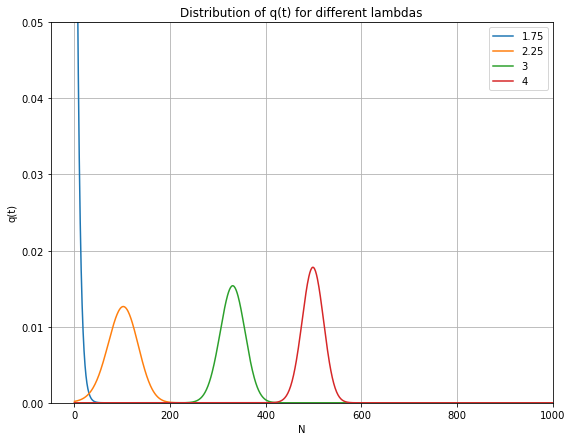

In [4]:
def plotd(lamda):
    for i,j in enumerate(lamda): 
        qt = findq(N,mu,lamda[i]) # iterating over different lambdas
        plt.rcParams['figure.figsize'] = (9,7)
        plt.plot(qt)
    plt.xlabel("N")
    plt.ylabel("q(t)")
    plt.title("Distribution of q(t) for different lambdas")
    plt.legend(lamda)
    plt.grid()
    plt.axis([-50.0, 1000, 0.0, 0.05]) # [xstart, xend, ystart, yend]
    plt.show()    
plotd(lamda)

In [5]:
def findPi(N,lamda,mu):
    Pi_list = []
    Pi_list.append(1) # P10(0) = 1
    Pi_list.append(lamda)
    lamda_list = []
    lamda_list.append(lamda) # λ(0) = λ
    lamda_list.append(lamda*(N-1)/N) 
    for i in range(2,N):
        mean_pow = Decimal(mu)**Decimal(i-1)
        ldec = list(map(Decimal,lamda_list)) 
        y = reduce(lambda x, y: x*y, ldec) 
        numerator = mean_pow * y
        ifact = Decimal(math.factorial(i)) # factorial stores long float leading to storage issues, so Decimal is used
        pi_i = Decimal(numerator)/Decimal(ifact)
        Pi_list.append(pi_i)
        L = lamda*i*(1 - (i/N)) # λ(i) = λ×i((N-i))/N
        lamda_list.append(L)
    pi_sum = np.sum(Pi_list)
    pi_0 = 1/pi_sum
    Pi_sec = [j * pi_0 for j in Pi_list]
    Pi = Pi_sec[1:]
    return Pi

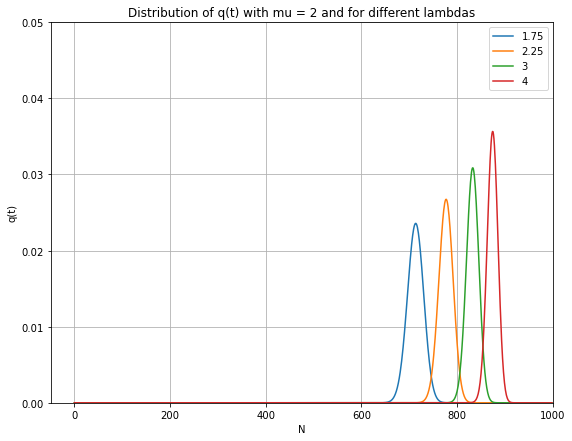

In [6]:
alpha0 = alpha[0]
beta0 = beta[0]
mul = alpha0*beta0
lamda = [1.75, 2.25, 3, 4]

def plotdg(lamda):
    for i,j in enumerate(lamda):
        Pi = findPi(N,mul,lamda[i])
        plt.rcParams['figure.figsize'] = (9,7)
        plt.plot(Pi)
    plt.xlabel("N")
    plt.ylabel("q(t)")
    plt.title("Distribution of q(t) with mu = 2 and for different lambdas")
    plt.legend(lamda)
    plt.axis([-50.0, 1000, 0.0, 0.05])
    plt.grid()
    plt.show()    

plotdg(lamda)

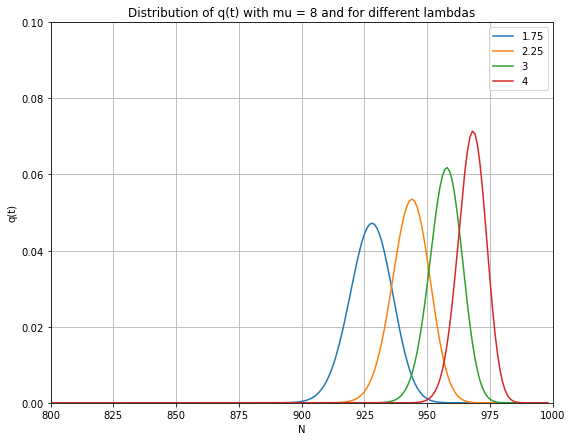

In [7]:
alpha0 = alpha[1]
beta0 = beta[1]
mul = alpha0*beta0
lamda = [1.75, 2.25, 3, 4]

def plotdg(lamda):
    for i,j in enumerate(lamda):
        Pi = findPi(N,mul,lamda[i])
        plt.rcParams['figure.figsize'] = (9,7)
        plt.plot(Pi)
    plt.xlabel("N")
    plt.ylabel("q(t)")
    plt.title("Distribution of q(t) with mu = 8 and for different lambdas")
    plt.legend(lamda)
    plt.axis([800.0, 1000, 0.0, 0.1])
    plt.grid()
    plt.show()    

plotdg(lamda)

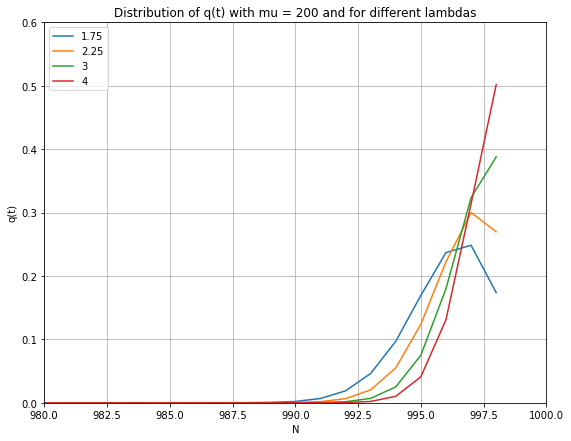

In [8]:
alpha0 = alpha[2]
beta0 = beta[2]
mul = alpha0*beta0
lamda = [1.75, 2.25, 3, 4]

def plotdg(lamda):
    for i,j in enumerate(lamda):
        Pi = findPi(N,mul,lamda[i])
        plt.rcParams['figure.figsize'] = (9,7)
        plt.plot(Pi)
    plt.xlabel("N")
    plt.ylabel("q(t)")
    plt.title("Distribution of q(t) with mu = 200 and for different lambdas")
    plt.legend(lamda)
    plt.axis([980.0, 1000, 0.0, 0.6])
    plt.grid()
    plt.show()    

plotdg(lamda)

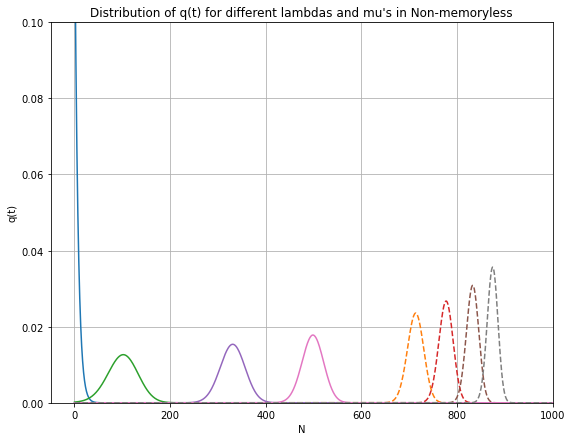

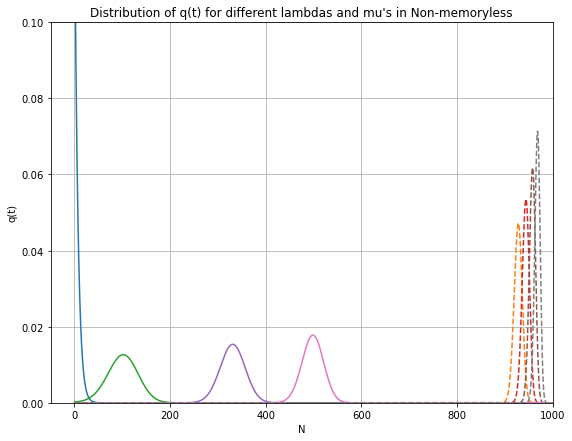

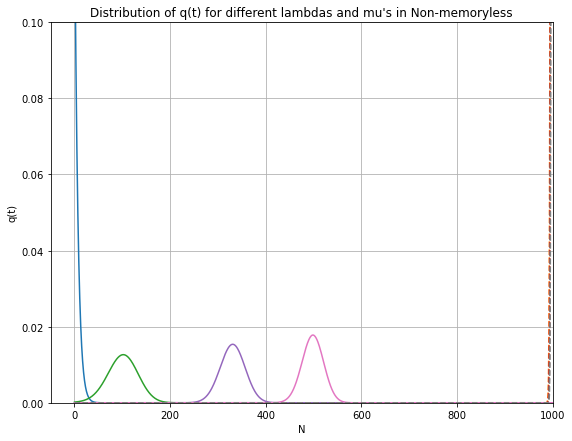

In [9]:
def plotdgd(lamda):
    for l,m in enumerate(zip(alpha,beta)):
        alpha0 = alpha[l]
        beta0 = beta[l]
        mul = alpha0*beta0
        for i,j in enumerate(lamda):
            qt = findq(N,mu,lamda[i])
            Pi = findPi(N,mul,lamda[i])
            plt.rcParams['figure.figsize'] = (9,7)
            plt.plot(qt,'-')
            plt.plot(Pi,'--')
        plt.xlabel("N")
        plt.ylabel("q(t)")
        plt.title("Distribution of q(t) for different lambdas and mu's in Non-memoryless")
        plt.grid()
        plt.axis([-50.0, 1000, 0.0, 0.1]) # [xstart, xend, ystart, yend]
        plt.show()    
plotdgd(lamda)